# Exploratory Data Analysis (EDA)

In [1]:
# import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# read the excel file and convert to a Pandas dataframe
df = pd.read_excel("side_effect_data 1.xlsx")

In [3]:
# shape of the data
df.shape

(2357, 19)

In [4]:
# return first 5 rows of the dataset
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [5]:
# return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [6]:
df['Yas'] = (df['Yan_Etki_Bildirim_Tarihi'] - df['Dogum_Tarihi']).dt.days // 365

df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,62
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0,82
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,45
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,44
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,45


In [7]:
# describing the data
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy,Yas
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000,2357.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431,46.746712
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000,10.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000,29.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000,48.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000,63.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000,82.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552,20.119399


In [8]:
# check for missing values
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
Yas                                   0
dtype: int64

In [9]:
# get numeric columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Kullanici_id', 'Kilo', 'Boy', 'Yas'], dtype='object')

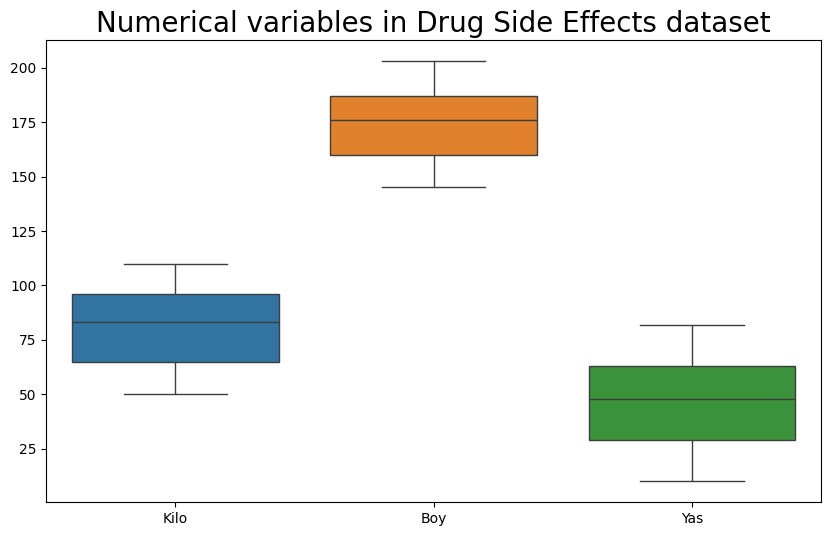

In [10]:
# Boxplot of numerical variables
plt.figure(figsize=(10,6))
sns.boxplot(df[num_cols].drop(columns='Kullanici_id'))
plt.title("Numerical variables in Drug Side Effects dataset", fontsize=20)
plt.show()

In [11]:
df.columns.to_list()

['Kullanici_id',
 'Cinsiyet',
 'Dogum_Tarihi',
 'Uyruk',
 'Il',
 'Ilac_Adi',
 'Ilac_Baslangic_Tarihi',
 'Ilac_Bitis_Tarihi',
 'Yan_Etki',
 'Yan_Etki_Bildirim_Tarihi',
 'Alerjilerim',
 'Kronik Hastaliklarim',
 'Baba Kronik Hastaliklari',
 'Anne Kronik Hastaliklari',
 'Kiz Kardes Kronik Hastaliklari',
 'Erkek Kardes Kronik Hastaliklari',
 'Kan Grubu',
 'Kilo',
 'Boy',
 'Yas']

Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64


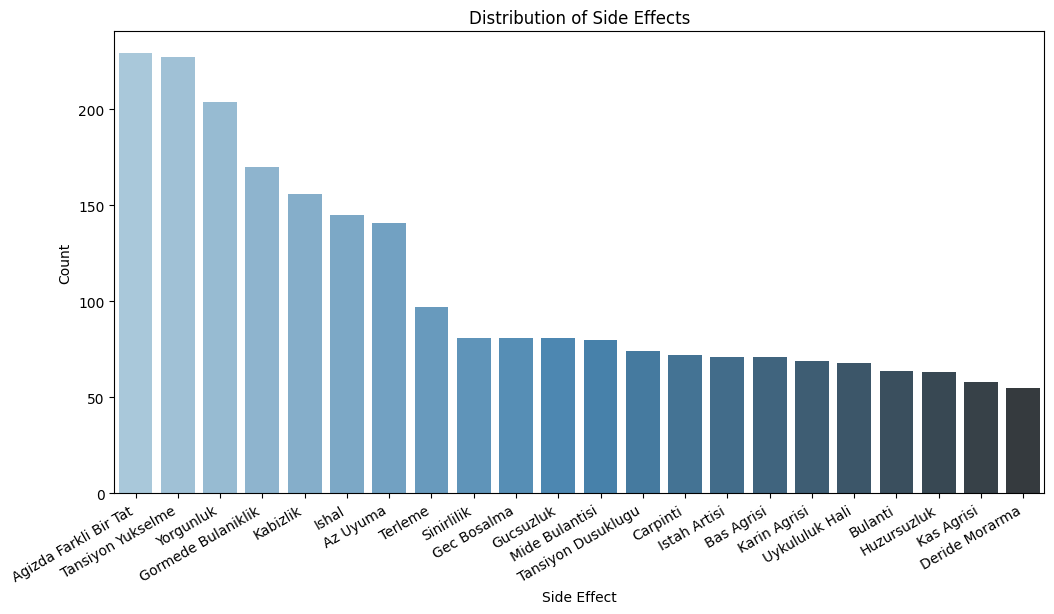

In [12]:
# visualizing side effect counts
side_effect_counts = df['Yan_Etki'].value_counts()
print(side_effect_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=side_effect_counts.index, y=side_effect_counts.values, palette='Blues_d')
plt.title('Distribution of Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()

Il
Adana        220
Mersin       207
Trabzon      195
Canakkale    179
Ankara       179
Eskisehir    174
Antalya      171
Bursa        169
Samsun       153
Istanbul     144
Izmir        121
Malatya      109
Kayseri      109
Name: count, dtype: int64


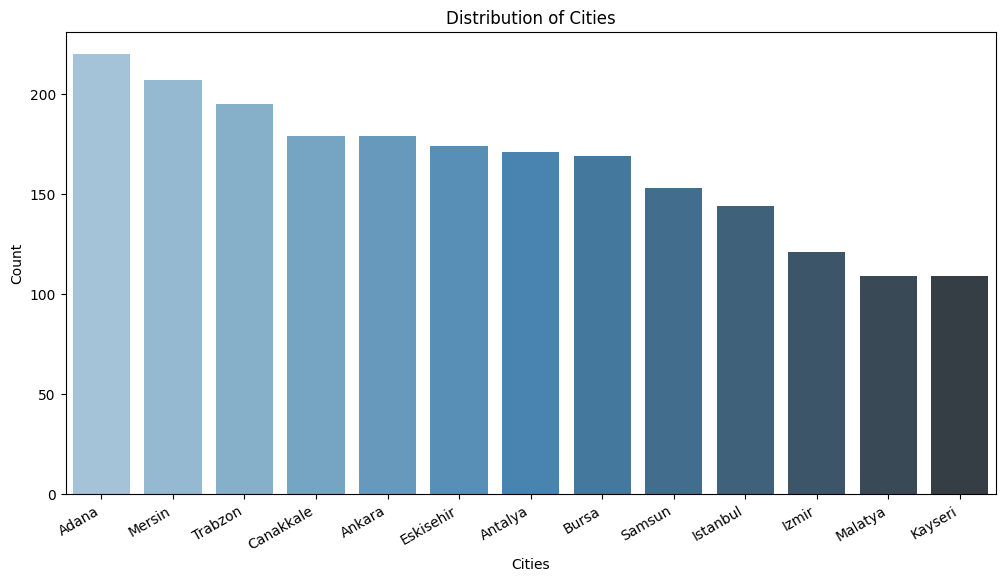

In [13]:
# distribution of cities
city_counts = df['Il'].value_counts()
print(city_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_d')
plt.title('Distribution of Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()

In [14]:
df["Cinsiyet"].value_counts()

Cinsiyet
Female    872
Male      707
Name: count, dtype: int64

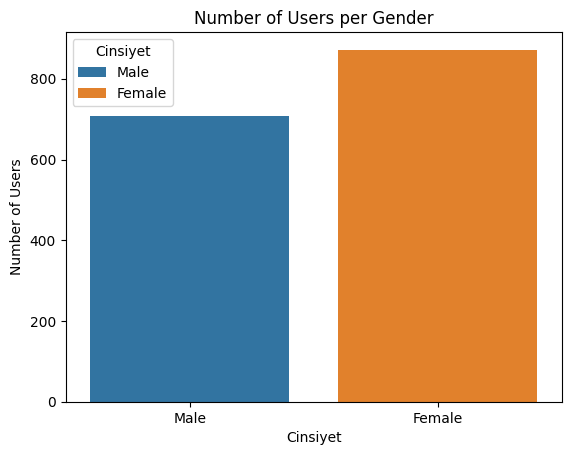

In [15]:
# visualizing gender distribution
sns.countplot(data=df, x="Cinsiyet", hue='Cinsiyet')
plt.title("Number of Users per Gender")
plt.ylabel("Number of Users")
plt.show()

In [16]:
# categorizing age
def categorize_age(age):
    if 0 <= age <= 12:
        return 'Çocuk'
    elif 13 <= age <= 25:
        return 'Genç'
    elif 26 <= age <= 65:
        return 'Yetişkin'
    else:
        return 'Yaşlı'

In [17]:
df['Yas_Grubu'] = df['Yas'].apply(categorize_age)

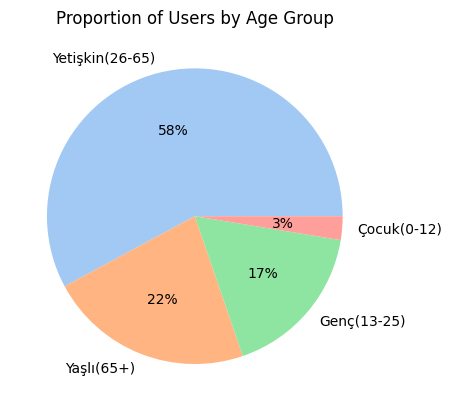

In [18]:
# visualizing age group distribution with pie chart
data = df["Yas_Grubu"].value_counts()

labels = ["Yetişkin(26-65)","Yaşlı(65+)","Genç(13-25)","Çocuk(0-12)"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Users by Age Group")
plt.show()

In [19]:
df.columns.to_list()

['Kullanici_id',
 'Cinsiyet',
 'Dogum_Tarihi',
 'Uyruk',
 'Il',
 'Ilac_Adi',
 'Ilac_Baslangic_Tarihi',
 'Ilac_Bitis_Tarihi',
 'Yan_Etki',
 'Yan_Etki_Bildirim_Tarihi',
 'Alerjilerim',
 'Kronik Hastaliklarim',
 'Baba Kronik Hastaliklari',
 'Anne Kronik Hastaliklari',
 'Kiz Kardes Kronik Hastaliklari',
 'Erkek Kardes Kronik Hastaliklari',
 'Kan Grubu',
 'Kilo',
 'Boy',
 'Yas',
 'Yas_Grubu']

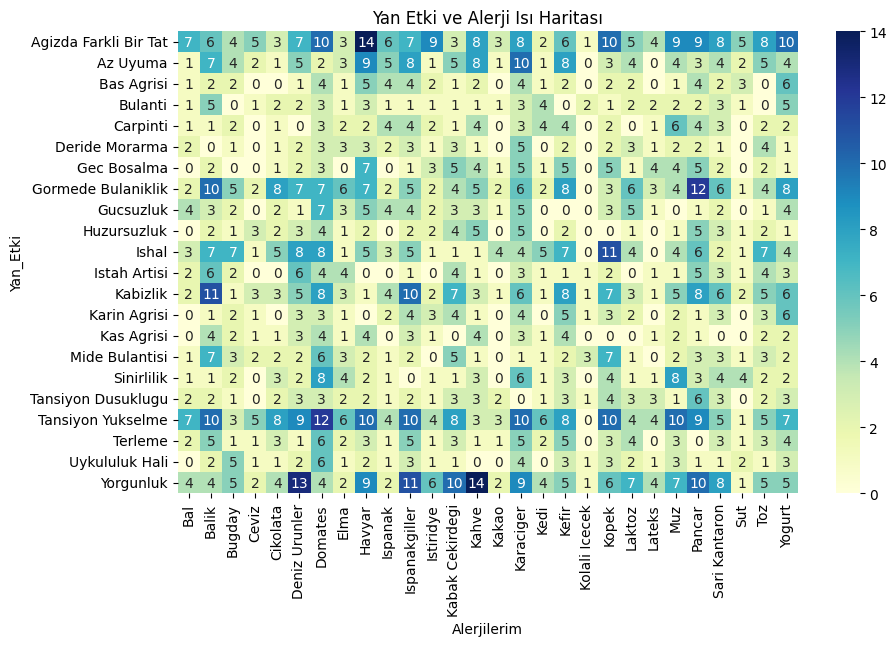

In [20]:
pivot_table = pd.crosstab(index=[df['Yan_Etki']], columns=df['Alerjilerim'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Yan Etki ve Alerji Isı Haritası')
plt.show()

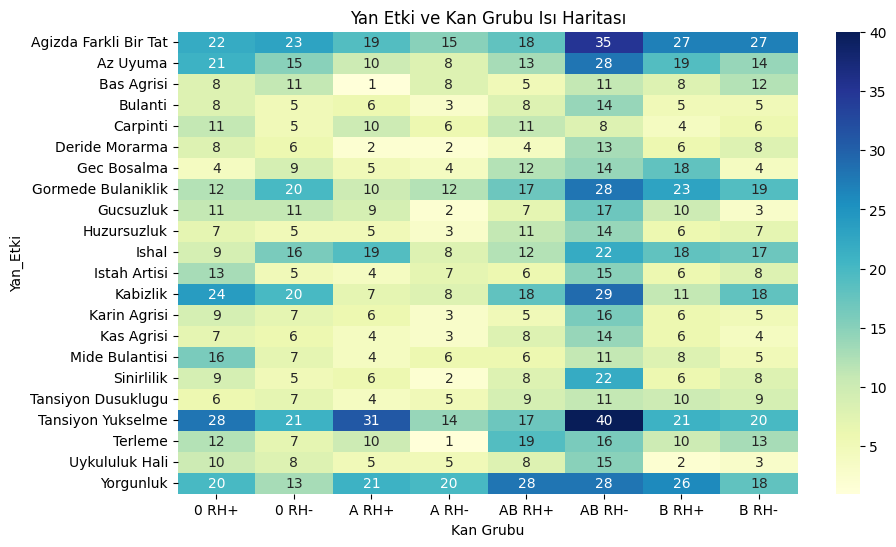

In [21]:
pivot_table = pd.crosstab(index=[df['Yan_Etki']], columns=df['Kan Grubu'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Yan Etki ve Kan Grubu Isı Haritası')
plt.show()

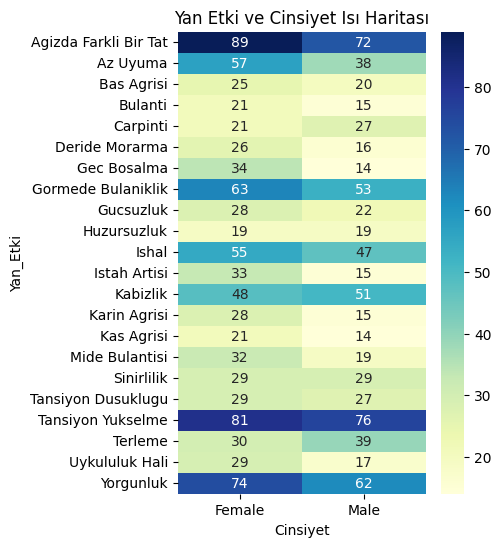

In [22]:
pivot_table = pd.crosstab(index=[df['Yan_Etki']], columns=df['Cinsiyet'])

plt.figure(figsize=(4, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Yan Etki ve Cinsiyet Isı Haritası')
plt.show()

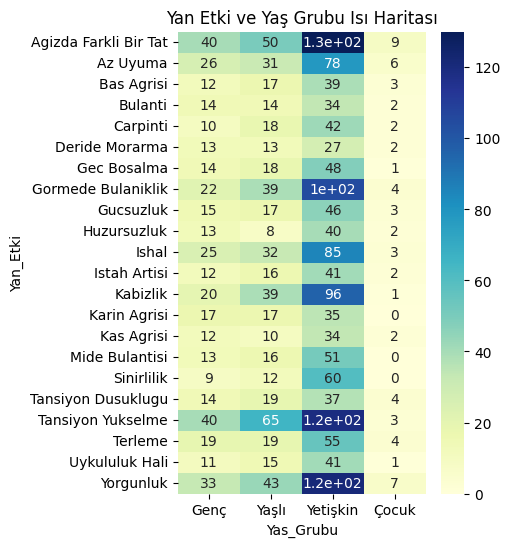

In [23]:
pivot_table = pd.crosstab(index=[df['Yan_Etki']], columns=df['Yas_Grubu'])

plt.figure(figsize=(4, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Yan Etki ve Yaş Grubu Isı Haritası')
plt.show()

# Data Pre-Processing

## Imputation

In [24]:
# check for missing values
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
Yas                                   0
Yas_Grubu                             0
dtype: int64

In [25]:
# encode the gender column before imputation
mask = df['Cinsiyet'].notnull()

le = LabelEncoder()
df.loc[mask, 'Cinsiyet'] = le.fit_transform(df.loc[mask, 'Cinsiyet'])

In [26]:
# fill nan values in the age column using KNNImputer 
df_subset = df[['Yas', 'Kilo', 'Boy', 'Cinsiyet']]

imputer = KNNImputer(n_neighbors=10)

df_imputed = imputer.fit_transform(df_subset)

df_imputed = pd.DataFrame(df_imputed, columns=['Yas', 'Kilo', 'Boy', 'Cinsiyet'])

df_imputed['Cinsiyet'] = df_imputed['Cinsiyet'].astype(int)
df_imputed['Cinsiyet'] = df_imputed['Cinsiyet'] 

df.update(df_imputed)

In [27]:
# imputing other columns by passing no info
imputer = SimpleImputer(strategy='constant', fill_value='No info')

df[['Il']] = imputer.fit_transform(df[['Il']])
df[['Alerjilerim']] = imputer.fit_transform(df[['Alerjilerim']])
df[['Kronik Hastaliklarim']] = imputer.fit_transform(df[['Kronik Hastaliklarim']])
df[['Baba Kronik Hastaliklari']] = imputer.fit_transform(df[['Baba Kronik Hastaliklari']])
df[['Anne Kronik Hastaliklari']] = imputer.fit_transform(df[['Anne Kronik Hastaliklari']])
df[['Kiz Kardes Kronik Hastaliklari']] = imputer.fit_transform(df[['Kiz Kardes Kronik Hastaliklari']])
df[['Erkek Kardes Kronik Hastaliklari']] = imputer.fit_transform(df[['Erkek Kardes Kronik Hastaliklari']])
df[['Kan Grubu']] = imputer.fit_transform(df[['Kan Grubu']])

In [28]:
# check for missing values again
df.isnull().sum()

Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
Yas                                 0
Yas_Grubu                           0
dtype: int64

## Encoding

In [29]:
# get categoric columns
cat_columns = df.select_dtypes(exclude='number').columns
cat_columns.to_list()

['Cinsiyet',
 'Dogum_Tarihi',
 'Uyruk',
 'Il',
 'Ilac_Adi',
 'Ilac_Baslangic_Tarihi',
 'Ilac_Bitis_Tarihi',
 'Yan_Etki',
 'Yan_Etki_Bildirim_Tarihi',
 'Alerjilerim',
 'Kronik Hastaliklarim',
 'Baba Kronik Hastaliklari',
 'Anne Kronik Hastaliklari',
 'Kiz Kardes Kronik Hastaliklari',
 'Erkek Kardes Kronik Hastaliklari',
 'Kan Grubu',
 'Yas_Grubu']

In [30]:
# apply one hot encoding 
columns_to_encode = ['Uyruk', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim', 'Kronik Hastaliklarim', 'Kan Grubu', 'Yas_Grubu']

df = pd.get_dummies(df, columns=columns_to_encode)

In [31]:
df.shape

(2357, 324)

## Scaling

In [32]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2357.0,81.055537,50.0,65.0,85.0,95.2,110.0,18.629588
Boy,2357.0,174.816631,145.0,160.0,178.0,187.0,203.0,16.581575
Yas,2357.0,46.746712,10.0,29.0,48.0,63.0,82.0,20.119399


In [33]:
scaler = MinMaxScaler()

df[['Kilo', 'Boy', 'Yas']] = scaler.fit_transform(df[['Kilo', 'Boy', 'Yas']])

In [34]:
df[['Kilo', 'Boy', 'Yas']].head()

,Kilo,Boy,Yas
0,0.883333,0.793103,0.722222
1,0.516667,0.620690,1.000000
2,0.716667,0.224138,0.486111
3,0.983333,0.344828,0.472222
4,0.816667,0.465517,0.486111
